In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import plotly.plotly as plotly
from plotly.graph_objs import *

In [2]:
#  Make notebook and pandas DataFrames look better
from IPython.core.display import HTML
css = open("../styles/style-table.css").read() + open('../styles/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
from model_def import get_payouts
max_tip = 5
num_tips = 100
curator_perc = 0.4
yours_perc = 0.1
df = get_payouts(max_tip=max_tip, num_tips=num_tips, curator_payout_perc=curator_perc, yours_payout_perc=yours_perc)
df.head()

Total tipped:    $248.36
Yours revenue:   $24.84
Creator revenue: $124.18
Curator revenue: $92.99


,tip,curator_payouts,yours_revenue,curator_num,total_earned
0,1.10514,"[0.315724351626, 0.234316232187, 0.07970648669...",0.110514,0,1.980263
1,2.76193,"[0.585596690933, 0.19920026204, 0.292148547075...",0.276193,1,4.159968
2,4.3618,"[0.314587854809, 0.461376826358, 0.34454448902...",0.43618,2,5.644841
3,1.81012,"[0.191468218418, 0.14298359976, 0.024212744369...",0.181012,3,2.212019
4,3.60914,"[0.285090718783, 0.0482770660932, 0.2419302311...",0.360914,4,4.028715


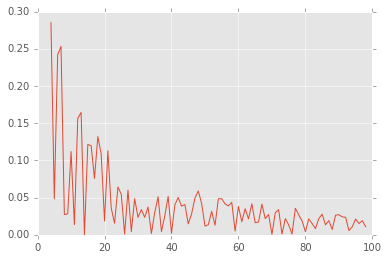

In [11]:
# Plot the payout of a given curator
curator_num = 5
plt.plot(df.curator_num[(curator_num-1):-1], df.curator_payouts[curator_num-1])

In [42]:
sizemode='area'
sizeref = df['total_earned'].max() / 1e2**1.5
labels = []
for exact in df['total_earned']:
    labels.append('${0:.2f}'.format(round(exact,2)))

# Define a trace-generating function (returns a Scatter object)
data = Data()
data.append(Scatter(
        x=df['curator_num'],              # Curator number
        y=df['tip'],                      # Amount of initial tip
        text=labels,                      # label on hover
        mode='markers',                   # (!) point markers only on this plot
        marker= Marker(       
            size=df.total_earned,         # (!) marker sizes (sizes is a list)
            sizeref=sizeref,              # link sizeref
            sizemode=sizemode,            # link sizemode
            opacity=0.5,                  # (!) partly transparent markers
            line=Line(width=0.0)          # remove marker borders
        )
    ))

# Set plot and axis titles
title = "Projected Yours Network Payout"
x_title = "Curator Number"
y_title = "Amount Tipped, (USD)"

# Define a dictionary of axis style options
axis_style = dict(
    zeroline=False,       # remove thick zero line
    gridcolor='#FFFFFF',  # white grid lines
    ticks='outside',      # draw ticks outside axes 
    ticklen=8,            # tick length
    tickwidth=1.5         #   and width
)

# Make layout object
layout = Layout(
    title=title,             # set plot title
    plot_bgcolor='#EFECEA',  # set plot color to grey
    xaxis=XAxis(
        axis_style,      # add axis style dictionary
        title=x_title,   # x-axis title
    ),
    yaxis=YAxis(
        axis_style,      # add axis style dictionary
        title=y_title,   # y-axis title
    )
)

# Make Figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
plotly.iplot(fig, filename='paymentModel')
